# **Лабораторная работа №6 по вычислительной математикe.**

## Работу выполнил: Шурыгин Антон, Б01 - 909.

### **VIII. 11.3**

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#### Исследуйте поведение фазовых траекторий для системы ОДУ

$$
 x' = y \\
 y' = x^{2} - 1
$$

вблизи особых точек (1, 0) и (-1, 0) с помощью двух методов Рунге-Кутты(первого и четвертого порядка аппроксимации). Значение $x(0), y(0)$ варьируйте самостоятельно.

In [208]:
x = sp.Symbol('x')
y = sp.Symbol('y')

diff_eqs = {"f1" : y, 
            "f2" : x ** 2 - 1}

def f(time, u_k):
    return np.array([diff_eqs["f1"].subs({x : u_k[0], y : u_k[1]}), 
                     diff_eqs["f2"].subs({x : u_k[0], y : u_k[1]})])

time_start = 0
time_end = 5

def ph_trjct_plot(phase_data, u_c):
    
    plt.figure(figsize=[16, 8])
    plt.plot(phase_data[0], phase_data[1], color='r')
    plt.plot(u_c[0], u_c[1], 'o')
    plt.title(f"Фазовая траектория в окрестности точки ({u_c[0]}, {u_c[1]})")

    plt.xlabel("x")
    plt.ylabel("y")

    plt.legend()
    plt.show()

### **Методы Рунге-Кутты** 

#### Для СДУ

$$
\frac{d\vec{u}}{dt} = \vec{f}(t, \vec{u})
$$

c задачей Коши:

$$
\overrightarrow{u(0)} = \overrightarrow{u_0}
$$

#### Рассмотрим метод Рунге-Кутты первого порядка аппроксимации

$$ \frac{\Delta\overrightarrow{u_n}}{\tau} = \overrightarrow{f}(t_n, \overrightarrow{u_n})  \:\: \Rightarrow \:\: \overrightarrow{u_{n + 1}} = \overrightarrow{u_n} + \tau \overrightarrow{f}(t_n, \overrightarrow{u_n}) $$

In [218]:
def RungeKutte1(u_0, u_c, iters):

    t_arr, tau = np.linspace(time_start, time_end, iters, retstep=True)
    phase_trajct = [u_0]
    u_n = np.array(u_0)

    for t_n in t_arr[1:]:
        u_n_1 = u_n + tau*f(t_n, u_n)
        phase_trajct.append(u_n_1)
        u_n = u_n_1

    ph_trjct_plot(np.transpose(phase_trajct), u_c)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.9 0.900050050050050 0.900095340585831 ... -0.819316602061489
  -0.811129304481523 -0.802950241369899]
 [0.01 0.00904904904904905 0.00809854901198748 ... 1.63582205647720
  1.63417680970250 1.63246475138712]]


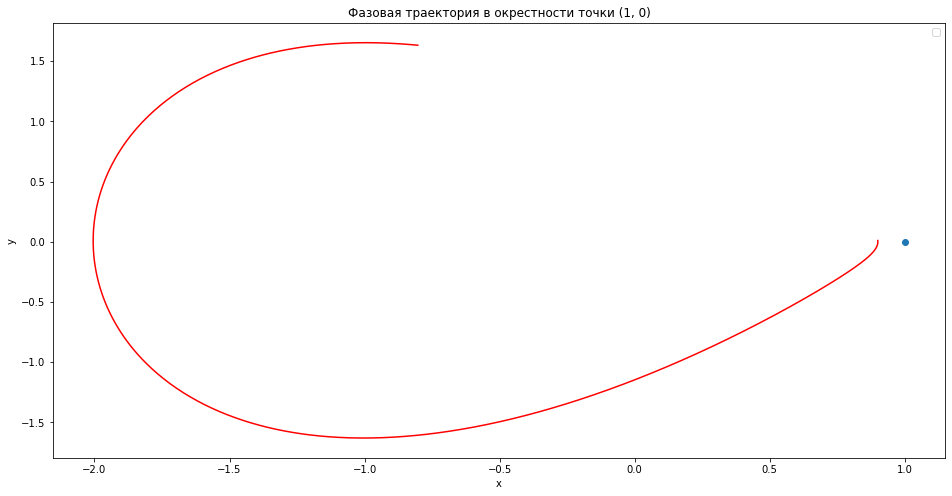

In [228]:
RungeKutte1(u_0=[0.90, 0.01], u_c=[1, 0], iters=1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[-0.9 -0.900050050050050 -0.900104859614369 ... -0.929901858616417
  -0.930422519684405 -0.930946569590014]
 [-0.01 -0.0109509509509510 -0.0119014509880125 ... -0.104028081384151
  -0.104705171140616 -0.105377413056853]]


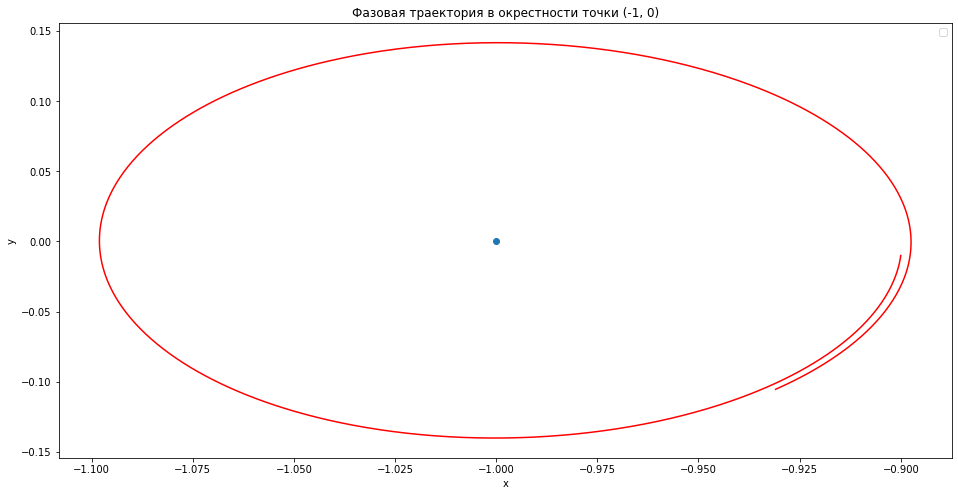

In [229]:
RungeKutte1(u_0=[-0.9, -0.01], u_c=[-1, 0], iters=1000)

#### Рассмотрим метод Рунге-Кутты четвертого порядка аппроксимации

$$ \frac{\Delta\overrightarrow{u_n}}{\tau} = \overrightarrow{f}(t_n, \overrightarrow{u_n})  \:\: \Rightarrow \:\: \overrightarrow{u_{n + 1}} = \overrightarrow{u_n} + \frac{k1 + 2k_2 + 2k_3 + k_4}{6} $$

где 

$$

k_1 = \tau \overrightarrow{f}(t_n, \overrightarrow{u_n})
\\
k_2 = \tau \overrightarrow{f}(t_n + \frac{\tau}{2}, \overrightarrow{u_n} + \frac{k_1}{2}) \\
k_3 = \tau \overrightarrow{f}(t_n + \frac{\tau}{2}, \overrightarrow{u_n} + \frac{k_2}{2})
\\
k_4 = \tau \overrightarrow{f}(t_n + \tau, \overrightarrow{u_n} + k_3)
$$

In [204]:
def RungeKutte4(u_0, u_c, iters):

    t_arr, tau = np.linspace(time_start, time_end, iters, retstep=True)

    phase_trajct = [u_0]
    u_n = np.array(u_0)

    for t_n in t_arr:
        
        k1 = tau * f(t_n, u_n)
        k2 = tau * f(t_n + tau/2, u_n + k1/2)
        k3 = tau * f(t_n + tau/2, u_n + k2/2)
        k4 = tau * f(t_n, u_n + k3)

        u_n_1 = u_n + (k1 + 2*k2 + 2*k3 + k4) / 6
        phase_trajct.append(u_n_1)
        u_n = u_n_1

    ph_trjct_plot(np.transpose(phase_trajct), u_c)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.9 0.900047670660106 0.900090583937608 ... -0.806723824858057
  -0.798692865030432 -0.790670975277952]
 [0.01 0.00904926735804253 0.00809894277138007 ... 1.60547042395461
  1.60369036824778 1.60184614149201]]


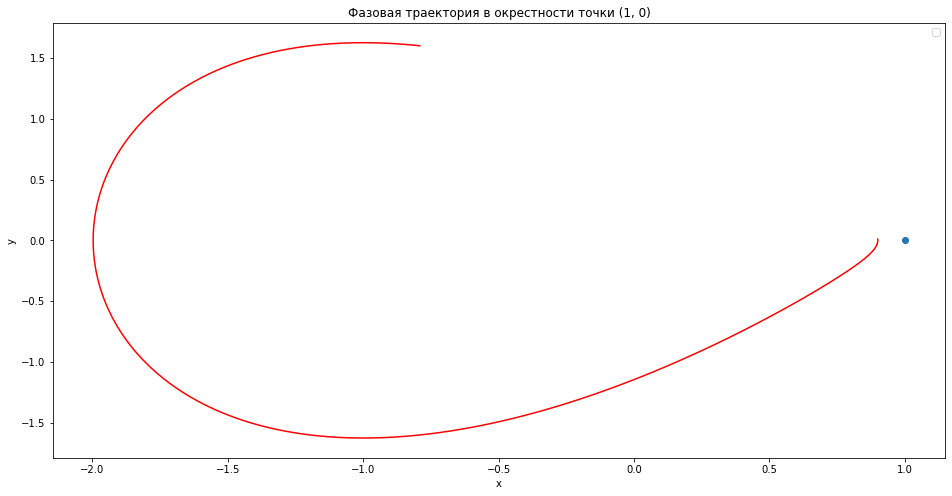

In [232]:
RungeKutte4(u_0=[0.9, 0.01], u_c=[1, 0], iters=1000)

[[-0.9 -0.900502876486895 -0.901010489788081 ... -0.976685087843585
  -0.977526954922045 -0.978369935244699]
 [-0.1 -0.100948688885344 -0.101892823448474 ... -0.168091082953934
  -0.168317629243057 -0.168535932334281]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


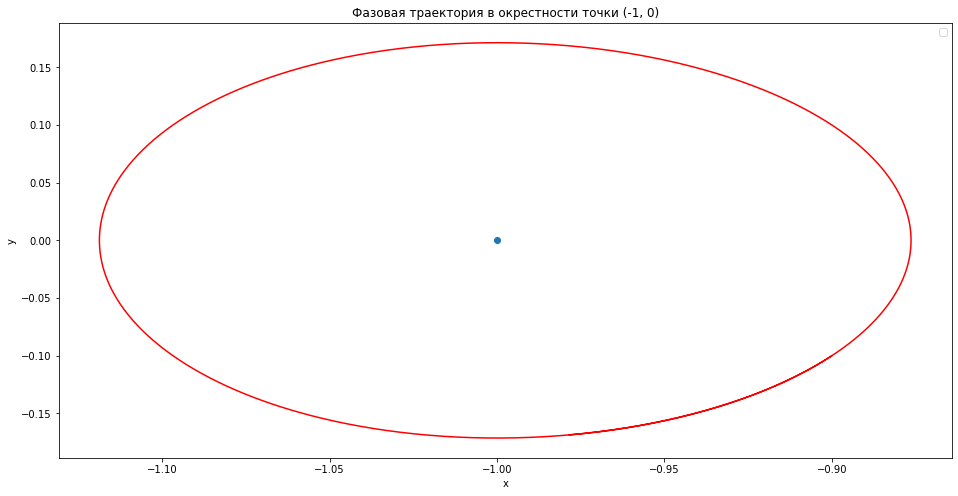

In [231]:
RungeKutte4(u_0=[-0.9, -0.1], u_c=[-1, 0], iters=1000)